<a href="https://colab.research.google.com/github/jackysuenpython/NLP-Auto-Predict-Password-Strength-Model/blob/main/NLP_predict_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
import sqlite3

In [280]:
con = sqlite3.connect('/content/password_data.sqlite')

In [281]:
data = pd.read_sql_query('SELECT * FROM Users', con)

In [282]:
data.shape

(100000, 3)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [284]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


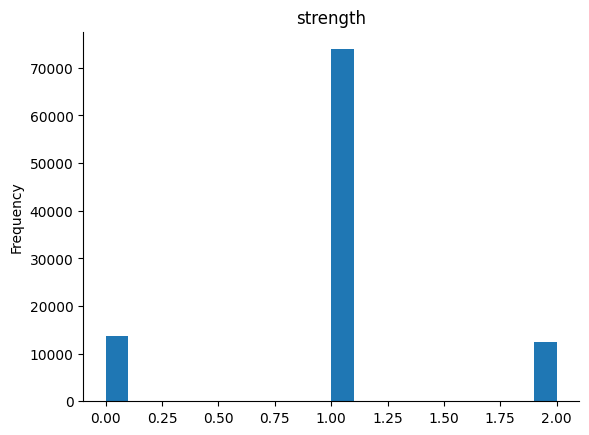

In [285]:
# @title strength

from matplotlib import pyplot as plt
data['strength'].plot(kind='hist', bins=20, title='strength')
plt.gca().spines[['top', 'right',]].set_visible(False)

Data Cleaning

In [286]:
data.columns


Index(['index', 'password', 'strength'], dtype='object')

In [287]:
data.drop(['index'], axis=1, inplace=True)

In [288]:
data.columns

Index(['password', 'strength'], dtype='object')

In [289]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [290]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [291]:
data.dtypes

password    object
strength     int64
dtype: object

In [292]:
data['strength'].unique()

array([1, 2, 0])

In [293]:
data.columns

Index(['password', 'strength'], dtype='object')

In [294]:
data['password'][0]

'zxe870819'

In [295]:
type(data['password'][0])

str

In [296]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [297]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [298]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [299]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [300]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [301]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [302]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [303]:
data['password'] #there is a password with symbol

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [304]:
  import string

In [305]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [306]:
def find_semantics(row):
  for char in row:
    if char in string.punctuation:
     return 1
    else:
     pass

In [307]:
data['password'].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [308]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


Feature Engineering

In [309]:
data['length'] = data['password'].str.len()
#create a new column that count the length of each password

In [310]:
data

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8
...,...,...,...
99995,obejofi215,1,10
99996,fmiopvxb64,1,10
99997,czvrbun38,1,9
99998,mymyxe430,1,9


In [311]:
password = 'Shan99'

In [312]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [313]:
len([char for char in password if char.islower()])

3

In [314]:
len([char for char in password if char.islower()])/len(password)

0.5

In [315]:
def freq_lowercase(row):
  return len([char for char in row if char.islower()])/len(row)

In [316]:
def freq_upperrcase(row):
  return len([char for char in row if char.isupper()])/len(row)

In [317]:
def freq_numerical_case(row):
  return len([char for char in row if char.isdigit()])/len(row)

In [318]:
data['lowercase_freq'] = np.round(data['password'].apply(freq_lowercase), 3)

data['upper_freq'] = np.round(data['password'].apply(freq_upperrcase), 3)

data['digit_freq'] = np.round(data['password'].apply(freq_numerical_case), 3)

In [319]:
data

,password,strength,length,lowercase_freq,upper_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375
...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300
99996,fmiopvxb64,1,10,0.800,0.0,0.200
99997,czvrbun38,1,9,0.778,0.0,0.222
99998,mymyxe430,1,9,0.667,0.0,0.333


In [320]:
def freq_special_case(row):
  special_chars=[]
  for char in row:
    if not char.isalpha() and not char.isdigit():
      special_chars.append(char)
  return len(special_chars)

In [321]:
data['special_case_freq'] = np.round(data['password'].apply(freq_special_case), 3)


In [322]:
data['special_case_freq'] = data['special_case_freq']/data['length']

data.head(5)

,password,strength,length,lowercase_freq,upper_freq,digit_freq,special_case_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


Perform descriptive analysis

In [323]:
data.describe()

,strength,length,lowercase_freq,upper_freq,digit_freq,special_case_freq
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.988730,9.986700,0.615026,0.053537,0.327797,0.003636
std,0.510926,2.887813,0.220644,0.153889,0.198814,0.027050
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,0.500000,0.000000,0.188000,0.000000
50%,1.000000,9.000000,0.667000,0.000000,0.300000,0.000000
75%,1.000000,11.000000,0.778000,0.000000,0.400000,0.000000
max,2.000000,220.000000,1.000000,1.000000,1.000000,1.000000


In [324]:
data[['length', 'strength']].groupby(['strength']).agg(['min','max','mean','median'])
#It shows that there is a correlation between longer password and the strength of the password

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [325]:
#lets see how the correlation of other features

In [326]:
cols = ['length', 'lowercase_freq', 'upper_freq', 'digit_freq', 'special_case_freq']

In [327]:
for col in cols:
  print(col)
  print(data[[col, 'strength']].groupby(['strength']).agg(['min','max','mean','median']))
  print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


upper_freq
         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.27

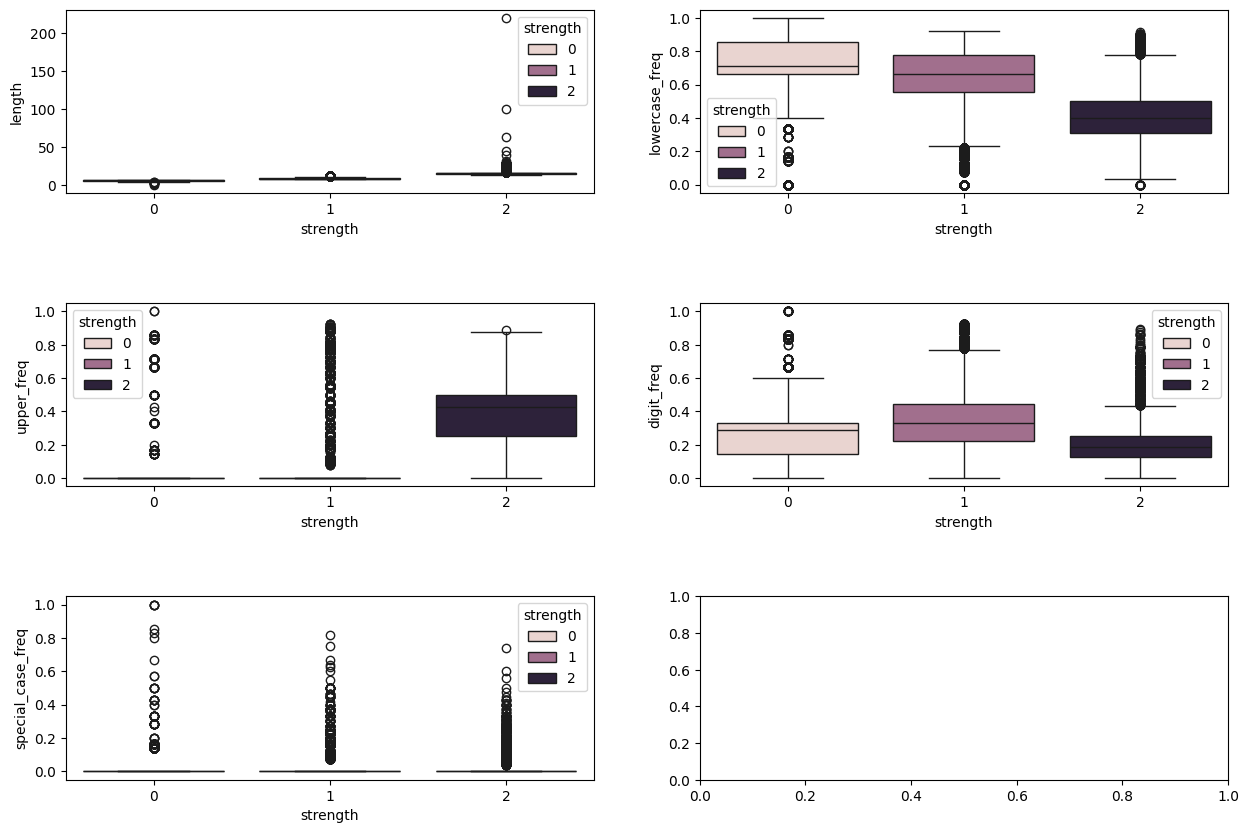

In [328]:
fig, ((ax1 , ax2), (ax3 , ax4), (ax5 , ax6)) = plt.subplots(3,2, figsize=(15,10))

sns.boxplot(x='strength', y='length', hue='strength', ax=ax1, data=data)
sns.boxplot(x='strength', y='special_case_freq', hue='strength', ax=ax5, data=data)
sns.boxplot(x='strength', y='lowercase_freq', hue='strength', ax=ax2, data=data)
sns.boxplot(x='strength', y='upper_freq', hue='strength', ax=ax3, data=data)
sns.boxplot(x='strength', y='digit_freq', hue='strength', ax=ax4, data=data)

plt.subplots_adjust(hspace=0.6)

In [329]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'upper_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

Feature Engineering - how many feature are useful for my machine learning model?

In [330]:
def get_dist(data, feature):
  plt.figure(figsize=(8,6))
  plt.subplot(1,2,1)
  sns.violinplot(x='strength', y=feature, data=data)
  plt.subplot(1,2,2)
  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
  sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
  sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
  plt.legend()
  plt.show()

In [331]:
  data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'upper_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

<ipython-input-330-793548ae7db5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
<ipython-input-330-793548ae7db5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==1][feature], color=

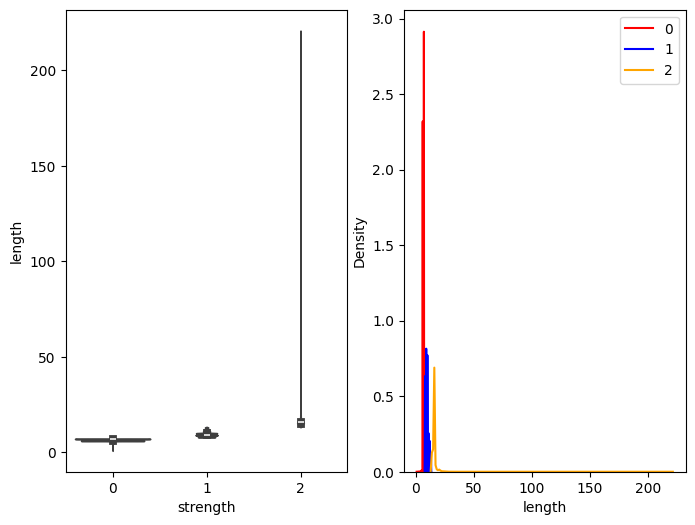

In [332]:
get_dist(data, 'length')

<ipython-input-330-793548ae7db5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
<ipython-input-330-793548ae7db5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==1][feature], color=

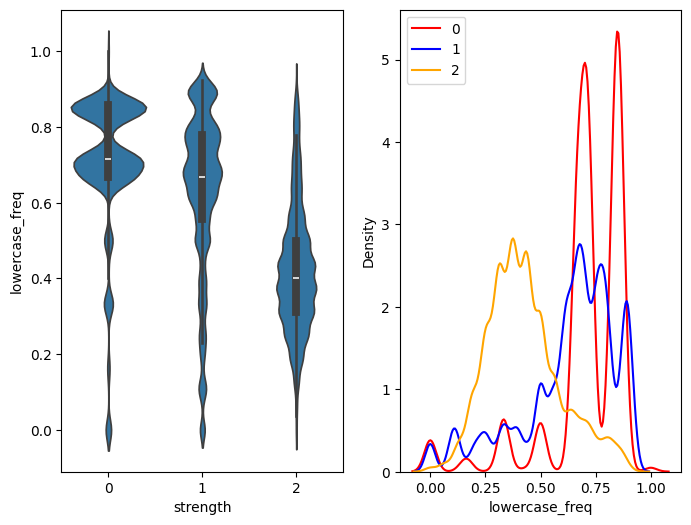

In [333]:
get_dist(data, 'lowercase_freq')

<ipython-input-330-793548ae7db5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
<ipython-input-330-793548ae7db5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==1][feature], color=

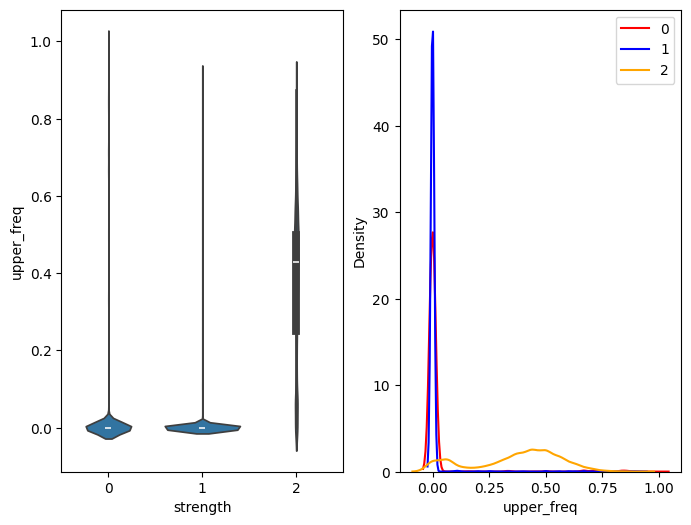

In [334]:
get_dist(data, 'upper_freq')

<ipython-input-330-793548ae7db5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
<ipython-input-330-793548ae7db5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==1][feature], color=

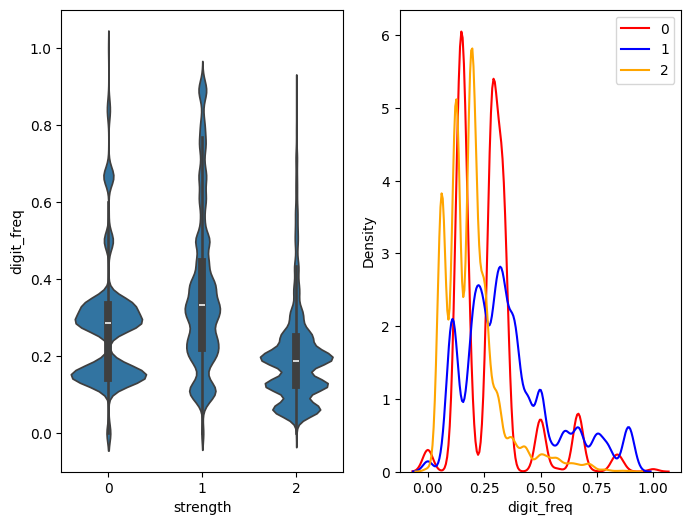

In [335]:
get_dist(data, 'digit_freq')

<ipython-input-330-793548ae7db5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature], color="red", label="0", hist=False)
<ipython-input-330-793548ae7db5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==1][feature], color=

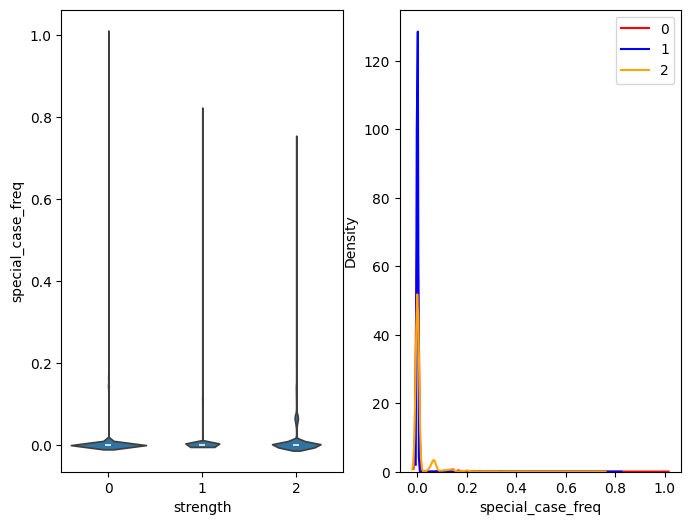

In [336]:
get_dist(data, 'special_case_freq')

Apply  TF-IDF on the data for NLP (assign weight to each word)

In [337]:
dataframe= data.sample(frac=1) #shuffle the data , reduce bias chance

In [338]:
dataframe

,password,strength,length,lowercase_freq,upper_freq,digit_freq,special_case_freq
62647,ocywy494,1,8,0.625,0.0,0.375,0.0
49015,sovkij0e,1,8,0.875,0.0,0.125,0.0
75677,mycro007,1,8,0.625,0.0,0.375,0.0
46414,yust21om,1,8,0.750,0.0,0.250,0.0
79419,mccoyniynah06,1,13,0.846,0.0,0.154,0.0
...,...,...,...,...,...,...,...
48547,hello111,1,8,0.625,0.0,0.375,0.0
8954,usylib648,1,9,0.667,0.0,0.333,0.0
58732,krismatheve1,1,12,0.917,0.0,0.083,0.0
50881,zysaky191,1,9,0.667,0.0,0.333,0.0


In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [340]:
x = list(dataframe['password'])

In [341]:
vectorizer = TfidfVectorizer(analyzer="char")

In [342]:
X = vectorizer.fit_transform(x)

In [343]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [344]:
X.shape

(100000, 99)

In [345]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [346]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.56705772,
       0.        , 0.        , 0.        , 0.        , 0.27707091,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29892375,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23450396, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33085533,
       0.        , 0.58980038, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [347]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [348]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [349]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'upper_freq',
       'digit_freq', 'special_case_freq'],
      dtype='object')

In [350]:
df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']


In [351]:
from sklearn.model_selection import train_test_split

In [352]:
y=dataframe['strength']

In [353]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [354]:
X_train.shape

(80000, 101)

In [355]:
y_train.shape

(80000,)

In [356]:
from sklearn.linear_model import LogisticRegression

In [357]:
clf = LogisticRegression(multi_class="multinomial")

In [358]:
clf.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [359]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [360]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [361]:
from collections import Counter

In [362]:
Counter(y_pred)

Counter({1: 16431, 0: 1496, 2: 2073})

Doing prediction on sample data (user-entered input)

In [363]:
password = "%@123abcd"

In [364]:
sample_array = np.array([password])

In [365]:
sample_matrix = vectorizer.transform(sample_array)

In [366]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [367]:
sample_matrix.toarray().shape

(1, 99)

In [368]:
password

'%@123abcd'

In [369]:
len(password)

9

In [370]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [371]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [372]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [373]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [374]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [375]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [376]:
clf.predict(new_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

### lets Automate it (lets design a function)

In [377]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [378]:
predict()

Enter a password : d18wda


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Password is weak'

Model evaluation :

In [379]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [380]:
accuracy_score(y_test , y_pred)

0.80345

In [381]:
confusion_matrix(y_test , y_pred)

array([[  796,  1927,     7],
       [  618, 13678,   471],
       [   82,   826,  1595]])

### create report of your model

In [382]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.38      2730
           1       0.83      0.93      0.88     14767
           2       0.77      0.64      0.70      2503

    accuracy                           0.80     20000
   macro avg       0.71      0.62      0.65     20000
weighted avg       0.78      0.80      0.79     20000

